<a href="https://www.oguzerdogan.com/">
    <img src="https://www.oguzerdogan.com/wp-content/uploads/2020/08/logo_.png" width="200" align="center">
</a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

# warning library
import warnings
warnings.filterwarnings('ignore')

## Create Data Sets

In [2]:
random_state = 42

n_samples = 200
n_features = 10
n_classes = 2
n_estimators = 10
noise_class = 0.1
noise_moon = 0.1
noise_circle = 0.1


In [3]:
x,y = make_classification(n_samples = n_samples,
                          n_features = n_features,
                          n_classes = n_classes,
                          n_repeated = 0,
                          n_redundant = 0,
                          n_informative = n_features - 1,
                          random_state = random_state,
                          n_clusters_per_class = 1,
                          flip_y = noise_class)


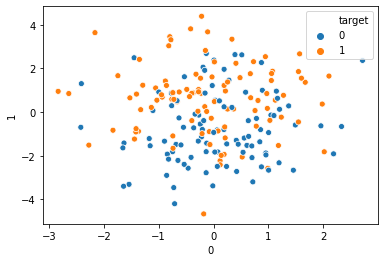

In [4]:
data = pd.DataFrame(x)
data["target"] = y
plt.figure()
sns.scatterplot(x = data.iloc[:,0], y = data.iloc[:,1], hue = "target", data = data);

This dataset for multiclass. And it will be called " Dataset # 2 "

In [5]:
data_classification = (x,y)

In [6]:
# Moon dataset
moon = make_moons(n_samples = n_samples,
                  noise = noise_moon,
                  random_state = random_state)

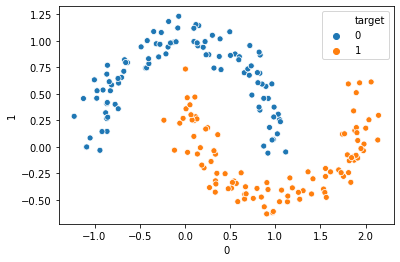

In [7]:
data_moon = pd.DataFrame(moon[0])
data_moon["target"] = moon[1]
plt.figure
sns.scatterplot(x = data_moon.iloc[:,0], y = data_moon.iloc[:,1], hue = "target", data = data_moon);

This dataset for binary classification.And it will be called " Dataset # 0 "

In [8]:
#Circle dataset
circle = make_circles(n_samples = n_samples,
                  noise = noise_circle,
                  factor = 0.1,
                  random_state = random_state)

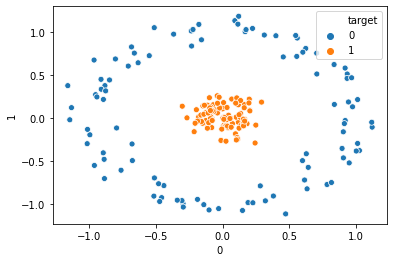

In [9]:
data_circle = pd.DataFrame(circle[0])
data_circle["target"] = circle[1]
plt.figure
sns.scatterplot(x = data_circle.iloc[:,0], y = data_circle.iloc[:,1], hue = "target", data = data_circle);

This dataset for binary classification.And it will be called " Dataset # 1 "

In order to be able to visualize in the future, we will have to combine data sets;

In [10]:
datasets = [moon, circle]

We are combining these two data sets as we will make binary classification.

In [11]:
# KNN, SVM, Decision Tree // Random Forest, AdaptiveBoosting

In [12]:
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=15)
dt = DecisionTreeClassifier(random_state = random_state)

rf = RandomForestClassifier(n_estimators = n_estimators, random_state = random_state)
ada = AdaBoostClassifier(base_estimator = dt, n_estimators = n_estimators, random_state = random_state)
v1 = VotingClassifier(estimators = [("svc",svc),("KNN",knn),("Decision Tree",dt),("Random Forest",rf),("AdaBoost",ada)])


classifiers = [svc, knn, dt, rf, ada, v1]
names = ["SVC", "KNN", "Decision Tree","Random Forest","AdaBoost","Voting Classifier"]

Dataset # 0
SVC: test set score: 0.975 
SVC: train set score: 0.9916666666666667 

KNN: test set score: 0.975 
KNN: train set score: 0.9916666666666667 

Decision Tree: test set score: 0.975 
Decision Tree: train set score: 1.0 

Random Forest: test set score: 0.95 
Random Forest: train set score: 0.9916666666666667 

AdaBoost: test set score: 0.975 
AdaBoost: train set score: 1.0 

Voting Classifier: test set score: 0.975 
Voting Classifier: train set score: 1.0 

-------------------------------------
Dataset # 1
SVC: test set score: 1.0 
SVC: train set score: 1.0 

KNN: test set score: 1.0 
KNN: train set score: 1.0 

Decision Tree: test set score: 0.9875 
Decision Tree: train set score: 1.0 

Random Forest: test set score: 1.0 
Random Forest: train set score: 1.0 

AdaBoost: test set score: 0.9875 
AdaBoost: train set score: 1.0 

Voting Classifier: test set score: 1.0 
Voting Classifier: train set score: 1.0 

-------------------------------------


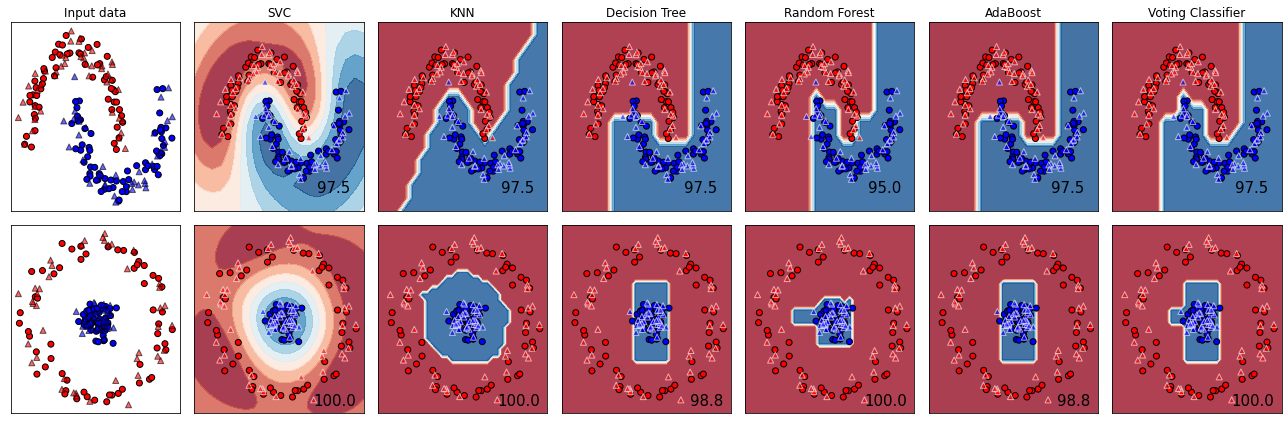

Dataset # 2
SVC: test set score: 0.9125 
SVC: train set score: 0.9666666666666667 

KNN: test set score: 0.8875 
KNN: train set score: 0.95 

Decision Tree: test set score: 0.825 
Decision Tree: train set score: 1.0 

Random Forest: test set score: 0.8375 
Random Forest: train set score: 1.0 

AdaBoost: test set score: 0.825 
AdaBoost: train set score: 1.0 

Voting Classifier: test set score: 0.9 
Voting Classifier: train set score: 1.0 



In [13]:
h = 0.2
i = 1
figure = plt.figure(figsize=(18, 6))
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=random_state)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    if ds_cnt == 0:
        ax.set_title("Input data")
        
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,marker = '^', edgecolors='k')
    
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    print("Dataset # {}".format(ds_cnt))

    for name, clf in zip(names, classifiers):
        
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        clf.fit(X_train, y_train)
        
        score = clf.score(X_test, y_test)
        
        print("{}: test set score: {} ".format(name, score))
        
        score_train = clf.score(X_train, y_train)  
        
        print("{}: train set score: {} ".format(name, score_train))
        print()
        
        
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,marker = '^',
                   edgecolors='white', alpha=0.6)

        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        score = score*100
        ax.text(xx.max() - .3, yy.min() + .3, ('%.1f' % score),
                size=15, horizontalalignment='right')
        i += 1
    print("-------------------------------------")

plt.tight_layout()
plt.show()

def make_classify(dc, clf, name):
    x, y = dc
    x = RobustScaler().fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=random_state)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print("{}: test set score: {} ".format(name, score))
        score_train = clf.score(X_train, y_train)  
        print("{}: train set score: {} ".format(name, score_train))
        print()

print("Dataset # 2")   
make_classify(data_classification, classifiers,names)  

# SUMMARY

- Our models work well as there is a distinction between our classes.
- Increasing the feature number makes the SVM model better.
- SVM performance decreases if noise increases
- If the number of classes increases, KNN will give good results.
- If the number of features increases, SVM will give good results.
- When the number of samples reaches 20000 30000, it may make sense to turn to a neural network.

## SVM

- Difficult to understand, not an easy-to-learn model
- It is not easy to interpret the results
- If the number of feature is set correctly, it can be successful despite high noise


## KNN
- Very simple algorithm
- Does not require training
- As the size of the data increases, the decision-making time in KNN may take longer
- For training : time efficient | for test : no time efficient
- Affected by outliers

## Between KNN AND SVM

- If dimension ( number of feature) is increasing : choose SVM
- If number of class is increasing : choose KNN
- SVM for binary classification
- KNN for multiclass problems

## Decision Tree
- The biggest problem is overfitting
For fix this:
1) Regularization
2) Random Forest
- Very effective in simple data sets
- But very affected by outliers

## Random Forest
- Consists of trees
- Doing random forest with decision tree when overfitting has reduced overfitting a bit 
- Feature importance estimation is really good

------------------------------
- n_samples = 200
- n_features = 10
- n_classes = 2
- n_estimators = 10
- noise_moon = 0.1 noise_circle = 0.1 noise_class = 0.2

------------------------------

## Results :

<b>Data Set # 0 ( Moon )</b>
- Decision Tree: test set score: 0.975 
- Decision Tree: train set score: 1.0 


- Random Forest: test set score: 0.95 
- Random Forest: train set score: 0.9916666666666667 

<b>Data Set # 1 ( Circle )</b>
- Decision Tree: test set score: 0.9875 
- Decision Tree: train set score: 1.0 


- Random Forest: test set score: 1.0 
- Random Forest: train set score: 1.0 

<b>Data Set # 2 ( Classification )  #There is overfitting problem </b>
- Decision Tree: test set score: 0.65 
- Decision Tree: train set score: 1.0 


- Random Forest: test set score: 0.75 
- Random Forest: train set score: 0.9666666666666667 

<b> (In Data Set # 2 Overfitting decreased a little when random forest was made on the decision tree )</b>

### How can we fix overfitting problem ?

### Lets increase the number of samples 200 to 2000

Dataset # 0

- Decision Tree: test set score: 0.9875 
- Decision Tree: train set score: 1.0 


- Random Forest: test set score: 0.99875 
- Random Forest: train set score: 1.0 




Dataset # 1

- Decision Tree: test set score: 0.99625 
- Decision Tree: train set score: 1.0 


- Random Forest: test set score: 0.99125 
- Random Forest: train set score: 1.0 

Dataset # 2

- Decision Tree: test set score: <b>0.775</b>  (old 0.65)
- Decision Tree: train set score: <b>1.0</b> 


- Random Forest: test set score: <b>0.84875</b>  (old 75)
- Random Forest: train set score: <b>0.985</b>  ( old 96)


Overfitting has dropped a little


### So what if too much noise is increased, lets check

------------------------------
- n_samples = 200
- n_features = 10
- n_classes = 2
- n_estimators = 10
- noise_moon = 0.1 noise_circle = 0.1 noise_class = 0.2

------------------------------

## Results :

<b>Dataset # 0</b>

- Decision Tree: test set score: 0.72125 
- Decision Tree: train set score: 1.0 

        
- Random Forest: test set score: 0.76125 
- Random Forest: train set score: 0.9791666666666666 

<b>Dataset # 1</b>

- Decision Tree: test set score: 0.575 
- Decision Tree: train set score: 1.0 

        
- Random Forest: test set score: 0.6425 
- Random Forest: train set score: 0.9816666666666667 

<b>Dataset # 2</b>

- Decision Tree: test set score: 0.5175 
- Decision Tree: train set score: 1.0 

        
- Random Forest: test set score: 0.52875 
- Random Forest: train set score: 0.9816666666666667 



<b>We couldn't decreased the overfitting with this way</b>

<b> change max_depth to 2 </b>

------------------------------
- n_samples = 200
- n_features = 10
- n_classes = 2
- n_estimators = 10
- noise_moon = 0.1 noise_circle = 0.1 noise_class = 0.2

------------------------------

## Results :

<b>Dataset # 0</b>

- Decision Tree: test set score: 0.78875 
- Decision Tree: train set score: 0.8108333333333333 


- Random Forest: test set score: 0.785 
- Random Forest: train set score: 0.8016666666666666 

<b>Dataset # 1</b>

- Decision Tree: test set score: 0.58875 
- Decision Tree: train set score: 0.6241666666666666 


- Random Forest: test set score: 0.6475 
- Random Forest: train set score: 0.705 

<b>Dataset # 2</b>

- Decision Tree: test set score: 0.585 
- Decision Tree: train set score: 0.6108333333333333 


- Random Forest: test set score: <b>0.58875</b> ( old 52)
- Random Forest: train set score: <b>0.6241666666666666</b> (old 98) 

<b>We can say fix the overfitting problem but our test score dropped considerably in general</b>

## Difference Between Random Forest and Adaboosting

1. Random Forest is based on bagging technique while Adaboost is based on boosting technique.

2. In Random Forest, certain number of full sized trees are grown on different subsets of the training dataset. Adaboost uses stumps (decision tree with only one split). So, Adaboost is basically a forest of stumps. These stumps are called weak learners. These weak learners have high bias and low variance. 

3. Each tree in the Random Forest is made up using all the features in the dataset while stumps use one feature at a time.

4. In Random Forest, each decision tree is made independent of each other. So, the order in which trees are made is not important. While in Adaboost, order of stumps do matter. The error that first stump makes, influence how the second stump is made and so on. Each stump is made by taking the previous stump's mistakes into account. It takes the errors from the first round of predictions, and passes the errors as a new target to the second stump. The second stump will model the error from the first stump, record the new errors and pass that as a target to the third stump. And so forth. Essentially, it focuses on modelling errors from previous stumps.

5. Random Forest uses parallel ensembling while Adaboost uses sequential ensembling. Random Forest runs trees in parallel, thus making it possible to parallelize jobs on a multiprocessor machine. Adaboost instead uses a sequential approach. 

6. Each tree in the Random Forest has equal amount of say in the final decision while in Adaboost different stumps have different amount of say in the final decision. The stump which makes less error in the prediction, has high amount of say as compared to the stump which makes more errors.

7. Random Forest aims to <b>decrease variance</b> not bias while Adaboost aims to <b>decrease bias</b> not variance.

8. There are <b>rare</b> chances of Random Forest to <b>overfit</b> while there are <b>good</b> chances of Adaboost to <b>overfit</b>.

References: 
    
- https://www.udemy.com/course/python-ile-makine-ogrenmesi-yapay-zeka-projeleri-52

- http://theprofessionalspoint.blogspot.com/2019/03/difference-between-random-forest-and.html#:~:text=Random%20Forest%20uses%20parallel%20ensembling,instead%20uses%20a%20sequential%20approach.